# Ejercicio 2.1
1- Realizar el ejercicio 2 del práctico 7 del curso 2021.

Sean X1 y X2 dos variables uniformes en [-4,5] e Y una variable que se quiere predecir a partir de ellas.

 a) Simular una relacion entre Y y (X1,X2) del tipo:
 n=100; a=-2; b=2; c=3
 x1=runif(n,-4,5); x2=runif(n,-4,5)
 y=exp(a*x1+b*x2+c + rnorm(n))
 y=y/(1+y) ; y=rbinom(n,1,y)

In [1]:
#PARTE a)
import numpy as np
import pandas as pd

# Parámetros
n = 100
a = -2
b = 2
c = 3

# Generar X1 y X2 (variables uniformes en [-4, 5])
x1 = np.random.uniform(-4, 5, n)
x2 = np.random.uniform(-4, 5, n)

# Simular Y
y_prob = np.exp(a * x1 + b * x2 + c + np.random.normal(0, 1, n))  # Probabilidad
y_prob = y_prob / (1 + y_prob)  # Transformar a probabilidad en [0, 1]
y = np.random.binomial(1, y_prob)  # Generar valores binarios de Y

# Crear un DataFrame para almacenar los datos
data = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y})
data.head()


,X1,X2,Y
0,-1.825710,1.922173,1
1,4.785839,-0.607960,0
2,-1.061049,3.900017,1
3,-1.634202,-3.452734,0
4,-2.603434,4.847631,1


Generación de
𝑋
1
X
1
​
  y
𝑋
2
X
2
​
 :

Usamos np.random.uniform para simular
𝑋
1
X
1
​
  y
𝑋
2
X
2
​
  de una distribución uniforme en el rango
[
−
4
,
5
]
[−4,5].
Cálculo de
𝑦
y:

Creamos una probabilidad intermedia (
𝑦
prob
y
prob
​
 ) basada en la fórmula:
𝑦
prob
=
exp
⁡
(
𝑎
𝑋
1
+
𝑏
𝑋
2
+
𝑐
+
ruido
)
1
+
exp
⁡
(
𝑎
𝑋
1
+
𝑏
𝑋
2
+
𝑐
+
ruido
)
y
prob
​
 =
1+exp(aX
1
​
 +bX
2
​
 +c+ruido)
exp(aX
1
​
 +bX
2
​
 +c+ruido)
​

El ruido se genera con np.random.normal.
Generación binaria de
𝑌
Y:

Convertimos las probabilidades en una variable binaria (
𝑌
∈
{
0
,
1
}
Y∈{0,1}) usando np.random.binomial.
DataFrame:

Guardamos
𝑋
1
X
1
​
 ,
𝑋
2
X
2
​
 , y
𝑌
Y en un DataFrame para un manejo más fácil.

## Parte b)
 Representar graficamente la nube de puntos formada por las variables explicativas, representando los puntos con colores distintos segun la modalidad de Y . Representar Y en funcion de X1 e Y en funcion de X2.

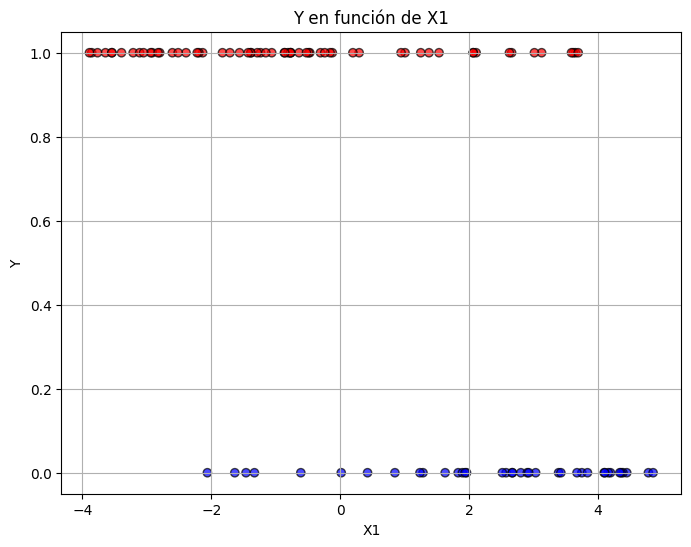

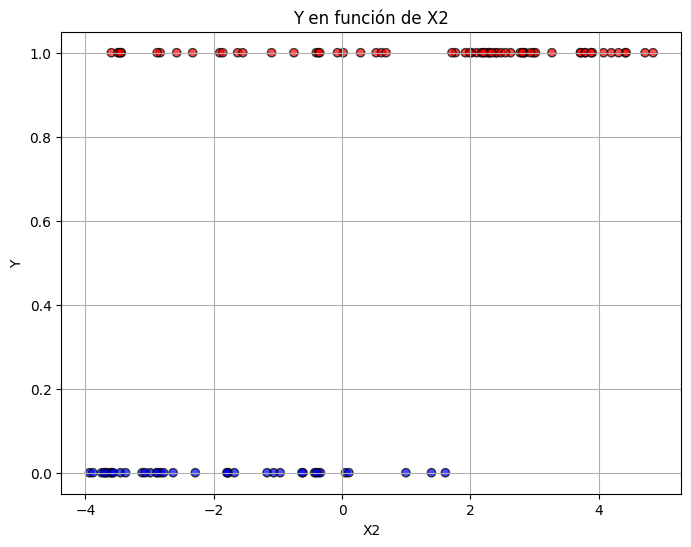

In [3]:
#parte b)
import matplotlib.pyplot as plt

# Gráfico 1: Y en función de X1
plt.figure(figsize=(8, 6))
plt.scatter(data['X1'], data['Y'], c=data['Y'], cmap='bwr', alpha=0.7, edgecolor='k')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Y en función de X1')
plt.grid()
plt.show()

# Gráfico 2: Y en función de X2
plt.figure(figsize=(8, 6))
plt.scatter(data['X2'], data['Y'], c=data['Y'], cmap='bwr', alpha=0.7, edgecolor='k')
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Y en función de X2')
plt.grid()
plt.show()


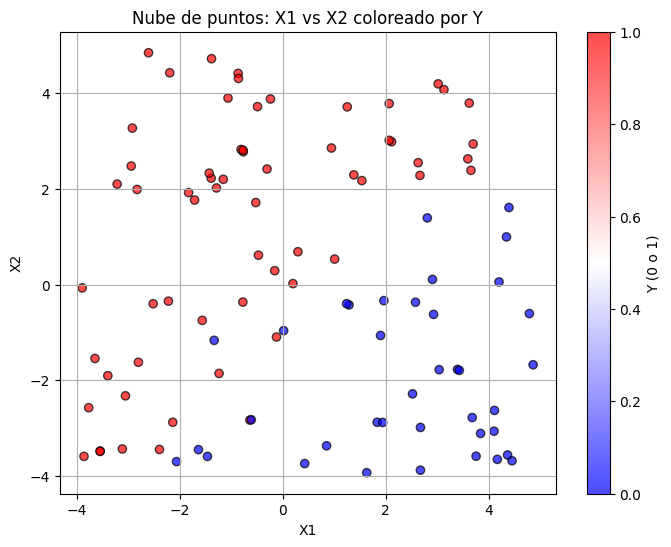

In [4]:
# GRAFICO CONJUNTO
# Gráfico de X1 vs X2 coloreado por Y
plt.figure(figsize=(8, 6))
plt.scatter(data['X1'], data['X2'], c=data['Y'], cmap='bwr', alpha=0.7, edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nube de puntos: X1 vs X2 coloreado por Y')
plt.colorbar(label='Y (0 o 1)')
plt.grid()
plt.show()


 ## Parte c)
  c) Estimar el modelo de regresion logistica a traves de la funcion glm:
 glm.res=glm(y~x1+x2,family=binomial)

 Comentar el resultado obtenido con el comando summary(glm.res) Cual es el aporte de cada variable
 explicativa?

In [5]:
import statsmodels.api as sm


In [6]:
# Agregar una constante para el término de intercepto (equivalente a ~1 en R)
X = sm.add_constant(data[['X1', 'X2']])  # X incluye la constante, X1 y X2
y = data['Y']  # Variable respuesta

# Ajustar el modelo de regresión logística
glm_res = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Mostrar el resumen del modelo
print(glm_res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.357
Date:                Sun, 08 Dec 2024   Deviance:                       24.714
Time:                        23:16:36   Pearson chi2:                     47.7
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6607
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1029      0.951      3.264      0.0

Este modelo de regresión logística ajustado busca predecir la probabilidad de que Y=1 en función de las variables explicativas X1 y X2. A partir de los resultados obtenidos, se observa que ambas variables son estadísticamente significativas (𝑝<0.05) y tienen impactos opuestos sobre la probabilidad de éxito.

El coeficiente de la constante (3.1029) es positivo y significativo (p=0.001), lo que indica que la probabilidad base de Y=1 (cuando X1=0 y X2=0) es relativamente alta. Este término actúa como punto de partida para las probabilidades ajustadas del modelo.

La variable X1 tiene un coeficiente de -2.3336, lo que implica que, a medida que X1 aumenta en una unidad, la probabilidad de que Y=1 disminuye exponencialmente. Este efecto negativo es estadísticamente significativo (p=0.001), lo que demuestra que X1 tiene un impacto importante en la probabilidad de éxito.

Por otro lado, X2 tiene un coeficiente positivo de 2.4168, indicando que a medida que X2 aumenta, la probabilidad de que Y=1 también incrementa de manera exponencial. Este efecto positivo también es estadísticamente significativo (
p=0.001), y su magnitud es ligeramente mayor que la de X1, lo que sugiere que el impacto positivo de X2 podría dominar en ciertas situaciones.

En términos generales, el modelo tiene un buen ajuste global, con un PseudoR
2=0.6607, lo que indica que las variables explicativas explican aproximadamente el 66.07% de la variación en los datos. Este es un indicador de que el modelo es adecuado para capturar la relación entre Y y las variables explicativas X1 y
X2.

En conclusión, ambas variables explicativas son fundamentales para predecir
Y.X1 reduce significativamente la probabilidad de éxito, mientras que
X2 la incrementa, y el modelo ajustado proporciona una visión robusta de cómo estas variables influyen en el resultado.

## Parte d)
 Realizar las predicciones de Y para la muestra de entrenamiento con
 yhat=predict(glm.res,data.frame(x1=x1,x2=x2),type=response)
 Convertir las probabilidades a clases y dar los resultados con una matriz de confusion table(yhat,y).

In [7]:
#utilizo metodo predict() del modelo ajustado para predecir las probabilidades de que Y=1 en training

# Realizar las predicciones de probabilidad
yhat_prob = glm_res.predict(sm.add_constant(data[['X1', 'X2']]))  # sm.add_constant asegura el término de intercepto


In [8]:
# Convertir probabilidades en clases (umbral = 0.5)
yhat_class = (yhat_prob >= 0.5).astype(int)


In [9]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(data['Y'], yhat_class)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[36  2]
 [ 1 61]]


In [10]:
# Crear un DataFrame para la matriz de confusión para verla mas clara
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=["Clase Real: 0", "Clase Real: 1"],
                              columns=["Clase Predicha: 0", "Clase Predicha: 1"])

print("Matriz de Confusión Formateada:")
print(conf_matrix_df)


Matriz de Confusión Formateada:
               Clase Predicha: 0  Clase Predicha: 1
Clase Real: 0                 36                  2
Clase Real: 1                  1                 61


## Parte e)
 Simular una nueva muestra de tamano 100. Calcular la sensibilidad y la especi cidad para seq(0,1,0.01).
 Trazar la curva ROC (como funcion escalera).



In [11]:
# Nueva muestra simulada
n_new = 100
x1_new = np.random.uniform(-4, 5, n_new)
x2_new = np.random.uniform(-4, 5, n_new)

# Generar Y para la nueva muestra
y_prob_new = np.exp(a * x1_new + b * x2_new + c + np.random.normal(0, 1, n_new))
y_prob_new = y_prob_new / (1 + y_prob_new)
y_new = np.random.binomial(1, y_prob_new)

# Crear un DataFrame para la nueva muestra
new_data = pd.DataFrame({'X1': x1_new, 'X2': x2_new, 'Y': y_new})


Para cada umbral, se calcula:
Sensibilidad (TPR): TP/ (TP+FN)
, mide la capacidad del modelo para detectar los verdaderos positivos.

Especificidad: Calculada como
1-FPR, donde FPR= FP/(FP+TN)
​
 .

In [12]:
from sklearn.metrics import confusion_matrix

# Predicción de probabilidades para la nueva muestra
X_new = sm.add_constant(new_data[['X1', 'X2']])  # Agregar intercepto
yhat_prob_new = glm_res.predict(X_new)  # Probabilidades predichas

# Definir la secuencia de umbrales
thresholds = np.arange(0, 1.01, 0.01)

# Inicializar listas para TPR (Sensibilidad) y FPR (1 - Especificidad)
tpr = []  # Sensibilidad
fpr = []  # 1 - Especificidad

for threshold in thresholds:
    # Convertir probabilidades en clases para el umbral actual
    y_pred_class = (yhat_prob_new >= threshold).astype(int)

    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(new_data['Y'], y_pred_class).ravel()

    # Calcular sensibilidad (TPR) y especificidad (1 - FPR)
    tpr.append(tp / (tp + fn))  # Sensibilidad
    fpr.append(fp / (fp + tn))  # 1 - Especificidad


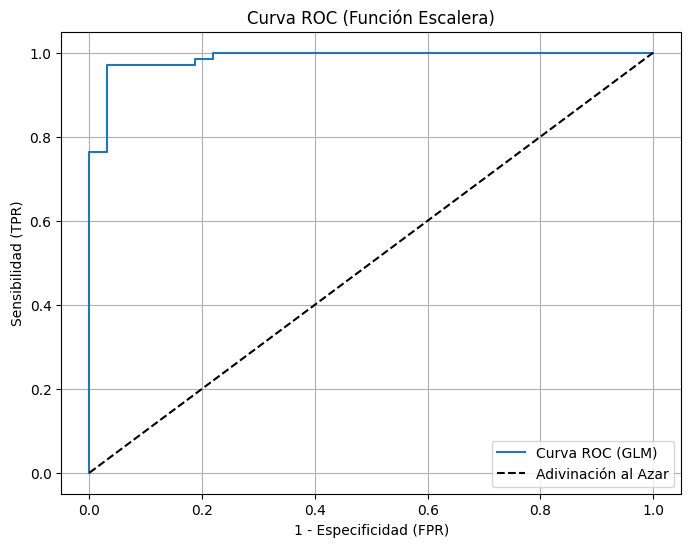

In [13]:
import matplotlib.pyplot as plt

# Graficar la curva ROC como escalera
plt.figure(figsize=(8, 6))
plt.step(fpr, tpr, where='post', label="Curva ROC (GLM)")
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")  # Línea diagonal
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Curva ROC (Función Escalera)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Se observa una gráfica en forma de escalera, mostrando cómo varían sensibilidad y especificidad para diferentes umbrales.
La línea diagonal representa un modelo que no es mejor que el azar.

Una curva que se acerca más al vértice superior izquierdo (alta sensibilidad y baja FPR) indica un modelo con mejor rendimiento.

## Parte f )
 Hacer lo mismo usando una sola variable explicativa en el modelo logstico. Superponer ambas curvas
 ROC y elegir el mejor modelo

In [14]:
# Ajustar modelo con una sola variable (X1)
X_single = sm.add_constant(new_data[['X1']])  # Solo X1 con el término de intercepto
glm_res_single = sm.GLM(new_data['Y'], X_single, family=sm.families.Binomial()).fit()

# Predicción de probabilidades para la nueva muestra
yhat_prob_single = glm_res_single.predict(X_single)


In [15]:
from sklearn.metrics import roc_auc_score

# Inicializar listas para TPR y FPR del modelo con una variable
tpr_single = []
fpr_single = []

for threshold in thresholds:
    # Convertir probabilidades en clases para el umbral actual
    y_pred_class_single = (yhat_prob_single >= threshold).astype(int)

    # Calcular matriz de confusión
    tn, fp, fn, tp = confusion_matrix(new_data['Y'], y_pred_class_single).ravel()

    # Calcular TPR y FPR
    tpr_single.append(tp / (tp + fn))  # Sensibilidad
    fpr_single.append(fp / (fp + tn))  # 1 - Especificidad

# Calcular el AUC del modelo con una variable
auc_single = roc_auc_score(new_data['Y'], yhat_prob_single)
print(f"AUC (Modelo con X1): {auc_single:.2f}")


AUC (Modelo con X1): 0.86


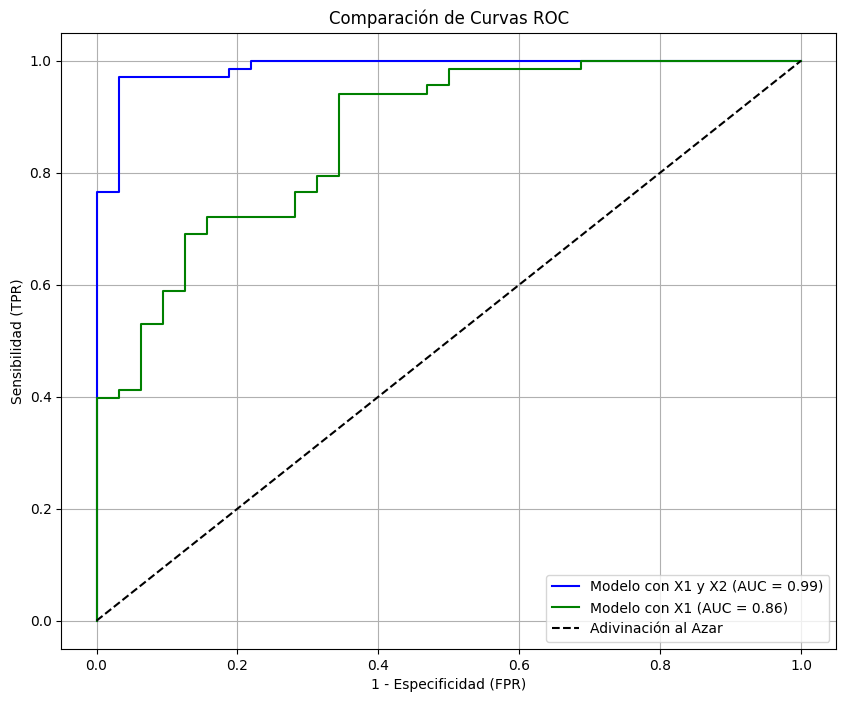

In [16]:
# Graficar ambas curvas ROC
plt.figure(figsize=(10, 8))

# Curva ROC del modelo con dos variables
plt.step(fpr, tpr, where='post', label=f"Modelo con X1 y X2 (AUC = {roc_auc_score(new_data['Y'], yhat_prob_new):.2f})", color='blue')

# Curva ROC del modelo con una variable
plt.step(fpr_single, tpr_single, where='post', label=f"Modelo con X1 (AUC = {auc_single:.2f})", color='green')

# Línea diagonal (azar)
plt.plot([0, 1], [0, 1], 'k--', label="Adivinación al Azar")

# Personalizar gráfico
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.title("Comparación de Curvas ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()


El mejor modelo se selecciona según el AUC: El modelo con un mayor AUC tiene un mejor rendimiento general, ya que discrimina mejor entre las clases positivas y negativas. Por lo tanto, el primer modelo con ambas variables es mejor.


# Ejercicio 2.2
 Con los mismos datos del ejercicio aplicar knn, lda, qda, y naiveBayes.

In [17]:
# preparacion de datos
#defino X (variables explicativas) e Y (variable objetivo)
X = new_data[['X1', 'X2']]  # Variables explicativas
y = new_data['Y']           # Variable objetivo


### KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar KNN con k=5 (puedes ajustar el valor de k)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Predicciones
y_pred_knn = knn.predict(X_scaled)

# Evaluación
print("Matriz de Confusión (KNN):")
print(confusion_matrix(y, y_pred_knn))
print("Exactitud (KNN):", accuracy_score(y, y_pred_knn))


Matriz de Confusión (KNN):
[[28  4]
 [ 1 67]]
Exactitud (KNN): 0.95


### LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Ajustar el modelo LDA
lda = LDA()
lda.fit(X, y)

# Predicciones
y_pred_lda = lda.predict(X)

# Evaluación
print("Matriz de Confusión (LDA):")
print(confusion_matrix(y, y_pred_lda))
print("Exactitud (LDA):", accuracy_score(y, y_pred_lda))


Matriz de Confusión (LDA):
[[29  3]
 [ 2 66]]
Exactitud (LDA): 0.95


### QDA

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Ajustar el modelo QDA
qda = QDA()
qda.fit(X, y)

# Predicciones
y_pred_qda = qda.predict(X)

# Evaluación
print("Matriz de Confusión (QDA):")
print(confusion_matrix(y, y_pred_qda))
print("Exactitud (QDA):", accuracy_score(y, y_pred_qda))


Matriz de Confusión (QDA):
[[29  3]
 [ 1 67]]
Exactitud (QDA): 0.96


### NAIVE BAYES

In [21]:
from sklearn.naive_bayes import GaussianNB

# Ajustar el modelo Naive Bayes
nb = GaussianNB()
nb.fit(X, y)

# Predicciones
y_pred_nb = nb.predict(X)

# Evaluación
print("Matriz de Confusión (Naive Bayes):")
print(confusion_matrix(y, y_pred_nb))
print("Exactitud (Naive Bayes):", accuracy_score(y, y_pred_nb))


Matriz de Confusión (Naive Bayes):
[[25  7]
 [ 0 68]]
Exactitud (Naive Bayes): 0.93


Con base en los resultados obtenidos:

---

KNN:

Matriz de confusión: 28 verdaderos negativos, 67 verdaderos positivos, 4 falsos positivos, y 1 falso negativo.

Exactitud:95%.

Observación: KNN tiene un buen desempeño, con solo un falso negativo, lo que significa que clasifica correctamente la mayoría de los casos positivos y negativos.

---

LDA (Linear Discriminant Analysis):

Matriz de confusión: 29 verdaderos negativos, 66 verdaderos positivos, 3 falsos positivos, y 2 falsos negativos.

Exactitud: 95%.

Observación: El desempeño de LDA es similar al de KNN, pero comete un error más en los falsos negativos, aunque sigue siendo un modelo robusto.

---
QDA (Quadratic Discriminant Analysis):

Matriz de confusión: 29 verdaderos negativos, 67 verdaderos positivos, 3 falsos positivos, y 1 falso negativo.

Exactitud: 96%.

Observación: QDA tiene el mejor desempeño entre los modelos evaluados, logrando una exactitud ligeramente superior al de KNN y LDA. Esto sugiere que la relación cuadrática entre las variables puede estar capturando mejor la estructura de los datos.

---

Naive Bayes:

Matriz de confusión: 25 verdaderos negativos, 68 verdaderos positivos, 7 falsos positivos, y 0 falsos negativos.

Exactitud: 93%.

Observación: Aunque el modelo Naive Bayes tiene una exactitud algo menor, no comete falsos negativos, lo que lo hace confiable para detectar todos los casos positivos, aunque clasifica erróneamente más casos negativos como positivos.

---

Comparación General:
Mejor modelo:QDA tiene la mejor exactitud (96%) y un balance óptimo entre falsos positivos y falsos negativos.

Si evitar falsos negativos (no perder casos positivos) es prioritario, Naive Bayes sería ideal, ya que no comete ningún falso negativo.
Si precisaramos un balance general, KNN, LDA, y QDA tienen desempeños similares, con QDA liderando ligeramente.

Escalabilidad:
Naive Bayes y LDA son modelos más rápidos y eficientes computacionalmente, ideales para datasets grandes.
En resumen, QDA es el modelo más efectivo en este caso, pero la elección final puede depender de las prioridades específicas del problema (minimizar falsos negativos, simplicidad, o escalabilidad).

# Ejercicio 2.3
Con los mismos datos del ejercicio aplicar SVM, RandomForests y CART

## SUPPORT VECTOR MACHINES (SVM)

In [22]:
# Datos de entrada
X = new_data[['X1', 'X2']]
y = new_data['Y']


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Ajustar SVM con kernel lineal
svm = SVC(kernel='linear', probability=True)  # probability=True para obtener probabilidades
svm.fit(X, y)

# Predicciones
y_pred_svm = svm.predict(X)

# Evaluación
print("Matriz de Confusión (SVM):")
print(confusion_matrix(y, y_pred_svm))
print("Exactitud (SVM):", accuracy_score(y, y_pred_svm))


Matriz de Confusión (SVM):
[[30  2]
 [ 2 66]]
Exactitud (SVM): 0.96


## RANDOMFORESTS (RF)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Ajustar Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predicciones
y_pred_rf = rf.predict(X)

# Evaluación
print("Matriz de Confusión (Random Forests):")
print(confusion_matrix(y, y_pred_rf))
print("Exactitud (Random Forests):", accuracy_score(y, y_pred_rf))


Matriz de Confusión (Random Forests):
[[32  0]
 [ 0 68]]
Exactitud (Random Forests): 1.0


## CART

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Ajustar CART
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X, y)

# Predicciones
y_pred_cart = cart.predict(X)

# Evaluación
print("Matriz de Confusión (CART):")
print(confusion_matrix(y, y_pred_cart))
print("Exactitud (CART):", accuracy_score(y, y_pred_cart))


Matriz de Confusión (CART):
[[32  0]
 [ 0 68]]
Exactitud (CART): 1.0


Support Vector Machine (SVM)

Matriz de Confusión:
30 verdaderos negativos, 66 verdaderos positivos, 2 falsos positivos, y 2 falsos negativos.

Exactitud:96%, lo que indica un desempeño excelente.

Observación:
El modelo SVM presenta un buen balance, con un pequeño número de falsos positivos y falsos negativos. Es efectivo en este caso, pero no logra la perfección alcanzada por los otros modelos.

---

Random Forests

Matriz de Confusión:
32 verdaderos negativos, 68 verdaderos positivos, 0 falsos positivos, y 0 falsos negativos.
Exactitud:100%, lo que significa que clasifica correctamente todos los datos.

Observación:
Random Forest logra una clasificación perfecta. Esto sugiere que es un modelo muy robusto para este conjunto de datos, probablemente debido a su capacidad para capturar interacciones y relaciones no lineales entre X1 y X2.

---

 CART (Classification and Regression Tree)

Matriz de Confusión:
32 verdaderos negativos, 68 verdaderos positivos, 0 falsos positivos, y 0 falsos negativos.

Exactitud: 100%, también clasifica perfectamente todos los datos.

Observación:
CART también logra una clasificación perfecta, lo que indica que el modelo es capaz de dividir correctamente los datos en función de las variables explicativas.

---

Comparación General

Mejor desempeño:
Tanto Random Forests como CART logran un rendimiento perfecto (100% de exactitud) y no cometen errores de clasificación (0 falsos positivos y 0 falsos negativos). SVM tiene un desempeño ligeramente inferior, con una exactitud de
96%.

Robustez: Random Forests tiende a ser más robusto en datos reales, ya que utiliza múltiples árboles para evitar sobreajustes, a diferencia de CART, que puede ser más susceptible al sobreajuste.
SVM puede ser mejor para datos con relaciones lineales o alta dimensionalidad, pero aquí no logra superar a Random Forests o CART.

Interpretabilidad: CART es el modelo más interpretable, ya que genera un único árbol que se puede visualizar fácilmente.
Random Forests y SVM son menos interpretables, pero suelen ser más precisos en problemas complejos.

Conclusión Final

Random Forests y CART son los mejores modelos para este conjunto de datos, ya que logran una clasificación perfecta. Si la interpretabilidad es importante, CART sería la opción preferida. Sin embargo, si buscas robustez en datos más grandes o complejos, Random Forests sería la elección ideal.
SVM también tiene un rendimiento excelente, pero no supera a los otros dos en este caso específico.

El hecho de que hayan dado tan bien estos modelos tambien puede estar vinculado a como se generaron los datos. Nosotros asumimos ciertas relaciones entre variables (entre X1,X2 y Y) que siguen cierto patron matematico conocido, no tiene ruido o relaciones complejas que este tipo de modelos necesite aprender. Justamente estos modelos estan hechos para capturar relaciones complejas entre variables, y si hay un patron claro y poco ruido entonces estos modelos capturaran las relaciones facilmente y se ajustaran mas a los datos. Generalmente, en la vida real, si un modelo tiene 100% de exactitud es una indicacion de que esta sobreajustando.